In [70]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d as p3d
import heapq
import xlwt

In [6]:
df = pd.read_excel(r"C:\Users\MAC\Desktop\finished_data.xls") #load the dataset
df.drop(["number","price","category"],axis=1,inplace=True)
df.head()

,laptitude,longitude
0,22.566142,113.980837
1,22.686205,113.940525
2,22.576512,113.957198
3,22.564841,114.244571
4,22.558888,113.950723


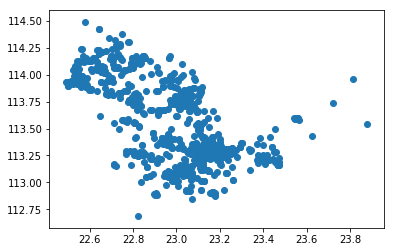

In [13]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [14]:
df['concentration']=None
df.head()

,laptitude,longitude,concentration
0,22.566142,113.980837,None
1,22.686205,113.940525,None
2,22.576512,113.957198,None
3,22.564841,114.244571,None
4,22.558888,113.950723,None


In [18]:
data = df.values[:, 0:3]
print(data)

[[22.566142254795 113.980836777953 None]
 [22.6862052598878 113.940525211308 None]
 [22.5765118283363 113.95719800411 None]
 ...
 [22.8146759735082 113.827731195748 None]
 [23.0636739781751 113.771188397476 None]
 [23.1232943054161 113.110382335887 None]]


In [62]:
def d2(P,Q):
    sum=0
    for i in range (1):
        
        sum+=(P[i]-Q[i])**2
    return sum

In [53]:
#index是某个点在dataset中的序列号
def concentration(point_index,data_mtx):
    distance=[]
    dataset2=deepcopy(data_mtx)
    dataset2=np.delete(dataset2,point_index,axis=0)
    
    for i in range(len(dataset2)):
        distance.append(d2(list(data_mtx[point_index]),list(dataset2[i])))
    large_10=heapq.nlargest(10,distance)
    return sum(large_10)/10

In [69]:
for i in df.index:
    df.iloc[i,2]=concentration(i,data)
df

,laptitude,longitude,concentration
0,22.566142,113.980837,1.16476
1,22.686205,113.940525,0.921536
2,22.576512,113.957198,1.14262
3,22.564841,114.244571,1.16756
4,22.558888,113.950723,1.18038
5,22.558999,114.241317,1.18014
6,22.549004,113.972260,1.20184
7,22.562774,113.956574,1.172
8,22.500012,113.895661,1.31105
9,22.543786,113.923978,1.21324


In [71]:
df.to_excel('concentration.xls')